In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')

In [13]:
mwig_df = pd.read_csv('mwig40.csv', parse_dates=['Data'])

In [14]:
mwig_df['day_change'] = ((mwig_df['Zamkniecie'] / mwig_df['Zamkniecie'].shift(1) ) - 1 ) * 100

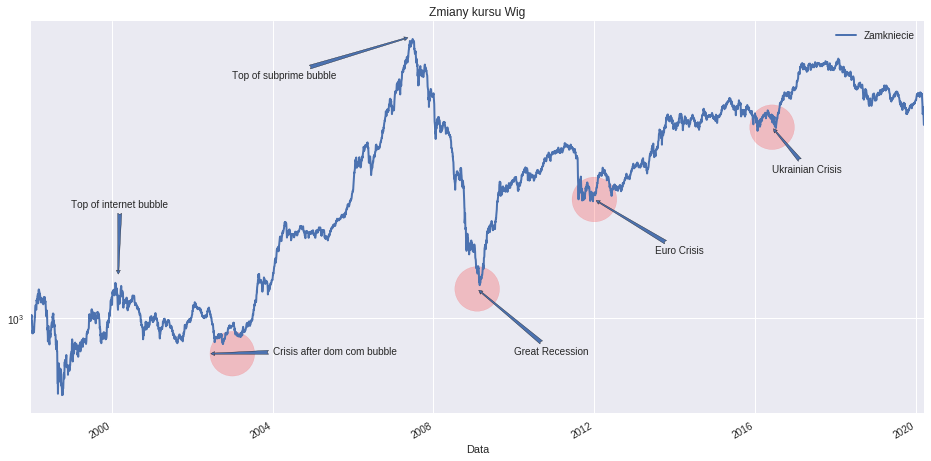

In [15]:
ax = plt.axes()

mwig_df.plot(x='Data', y='Zamkniecie', linewidth=2, figsize=[16, 8], ax=ax)

ax.set_title('Zmiany kursu Wig')
ax.set_yscale('log')

arrow_props = {'arrowstyle': 'fancy'}
annotates = [
    ['Top of internet bubble', [pd.Timestamp(2000, 3, 1),1300], [pd.Timestamp(1999, 1, 1), 2000]],
    ['Crisis after dom com bubble', [pd.Timestamp(2002, 6, 1), 800], [pd.Timestamp(2004,1,1), 800]],
    ['Top of subprime bubble', [pd.Timestamp(2007, 6, 1), 5800], [pd.Timestamp(2003, 1, 1), 4500]],
    ['Great Recession', [pd.Timestamp(2009, 2, 1), 1200], [pd.Timestamp(2010, 1, 1), 800]],
    ['Euro Crisis', [pd.Timestamp(2012, 1, 1), 2100], [pd.Timestamp(2013, 6, 30), 1500]],
    ['Ukrainian Crisis', [pd.Timestamp(2016, 6, 1), 3300], [pd.Timestamp(2016, 6, 1), 2500]]
]
for row in annotates:
    ax.annotate(row[0], xy=row[1], xytext=row[2], arrowprops=arrow_props)

extra_dots = np.array([
    [pd.Timestamp(2003, 1, 1), 800, 'red'],
    [pd.Timestamp(2009, 2, 1), 1200, 'red'],
    [pd.Timestamp(2012, 1, 1), 2100, 'red'],
    [pd.Timestamp(2016, 6, 1), 3300, 'red']
])
ax.scatter(extra_dots[:, 0], extra_dots[:,1], s=2000, alpha=0.2, c=extra_dots[:,2])

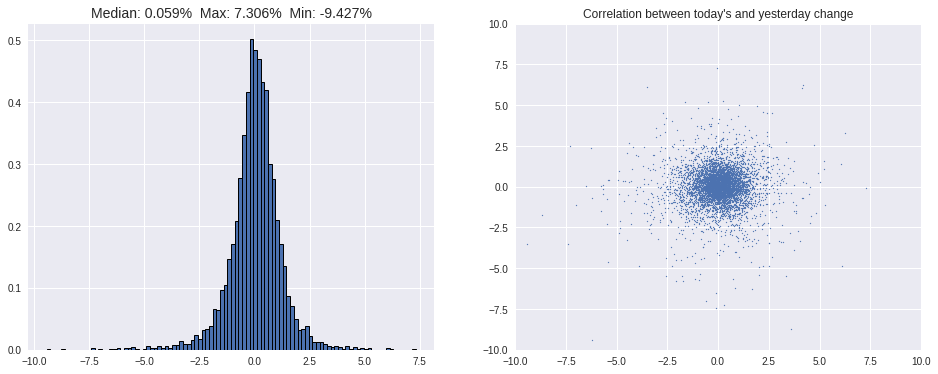

In [17]:
mediana = mwig_df['day_change'].median()
maximum = mwig_df['day_change'].max()
minimum = mwig_df['day_change'].min()
title = f'Median: {mediana:.3f}%  Max: {maximum:.3f}%  Min: {minimum:.3f}%'

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[16, 6])

mwig_df['day_change'].hist(bins=100, density=True, edgecolor='black', linewidth=1, ax=ax1)
ax1.set_title(title, fontsize=14)

mwig_df['day_ago_change'] = mwig_df['day_change'].shift()
ax2.scatter(mwig_df['day_change'], mwig_df['day_ago_change'].shift(), s=1)
title = f"Correlation between today's and yesterday change"
corr = mwig_df[['day_change', 'day_ago_change']].corr()
subtitle = f'Corr {corr.iloc[0,1]}'
ax2.set(xlim=(-10,10), ylim=(-10, 10), title=title);

In [7]:
def add_dates(df, date_column='Data'):
    min_date = df[date_column].min()
    max_date = df[date_column].max()
    all_dates = pd.date_range(min_date, max_date, freq='D')
    all_dates_df = pd.DataFrame({date_column: all_dates})
    df_with_dates = pd.merge(all_dates_df, df, how='left', on=date_column)
    return df_with_dates

In [44]:
temp_df = add_dates(mwig_df)

In [50]:
temp_df['1M_change'] = ((temp_df['Zamkniecie'] / temp_df['Zamkniecie'].shift(30)) - 1) * 100

In [51]:
temp_df = temp_df.fillna(method='ffill')
temp_df = temp_df.loc[temp_df['Data'].isin(mwig_df['Data'])]

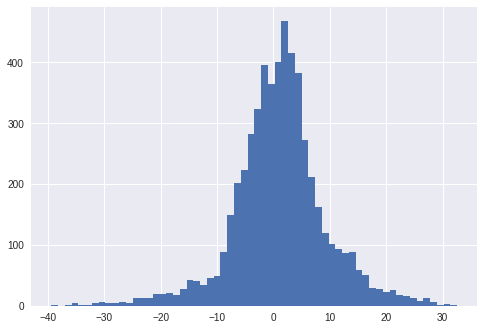

In [57]:
temp_df['1M_change'].hist(bins=60)

In [68]:
high_dates = temp_df.loc[temp_df['1M_change'] < -20, 'Data']
high_dates.dt.strftime('%m-%Y').unique()

array(['06-1998', '08-1998', '09-1998', '10-1998', '08-2007', '11-2007',
       '01-2008', '07-2008', '10-2008', '11-2008', '02-2009', '08-2011',
       '09-2011'], dtype=object)

In [54]:
temp_df.tail()

,Data,Unnamed: 0,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie,Wolumen,day_change,day_ago_change,1M_change
8099,2020-03-04,5548.0,3741.97,3743.93,3714.76,3716.26,4755791.0,-0.802387,3.546138,-8.150232
8100,2020-03-05,5549.0,3762.12,3770.52,3662.01,3690.89,4921506.0,-0.682676,-0.802387,-8.724479
8101,2020-03-06,5550.0,3651.56,3651.56,3575.83,3610.61,9459861.0,-2.175085,-0.682676,-11.193398
8104,2020-03-09,5551.0,3515.08,3516.23,3353.40,3385.71,10587811.0,-6.228864,-2.175085,-15.862287
8105,2020-03-10,5552.0,3368.22,3438.76,3331.55,3348.64,6641389.0,-1.094896,-6.228864,-16.555819


In [105]:
min_date = mwig_df['Data'].min()
max_date = mwig_df['Data'].max()

all_dates = pd.date_range(min_date, max_date, freq='D')
all_dates_df = pd.DataFrame({'Data': all_dates})
temp_df = pd.merge(all_dates_df, mwig_df, how='left', on='Data')
temp_df.fillna(method='ffill', inplace=True)
temp_df.dropna(inplace=True)
temp_df['1Y_change'] = ((temp_df['Zamkniecie'] / temp_df['Zamkniecie'].shift(365*1)) - 1) * 100
temp_df['PRED_1Y'] = ((temp_df['Zamkniecie'].shift(-365*5) / temp_df['Zamkniecie']) - 1) * 100

In [106]:
mwig_df_1Y = temp_df[temp_df['Data'].isin(mwig_df['Data'])].copy()
mwig_df_1Y.dropna(inplace=True)

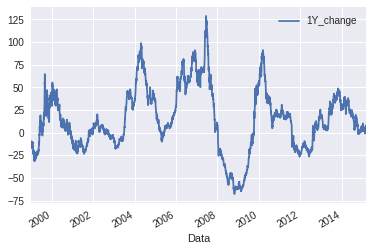

In [107]:
mwig_df_1Y.plot(x='Data', y='1Y_change');

In [108]:
tempor = mwig_df_1Y.copy()

,PRED_1Y,1Y_change
PRED_1Y,1.000000,-0.420737
1Y_change,-0.420737,1.000000


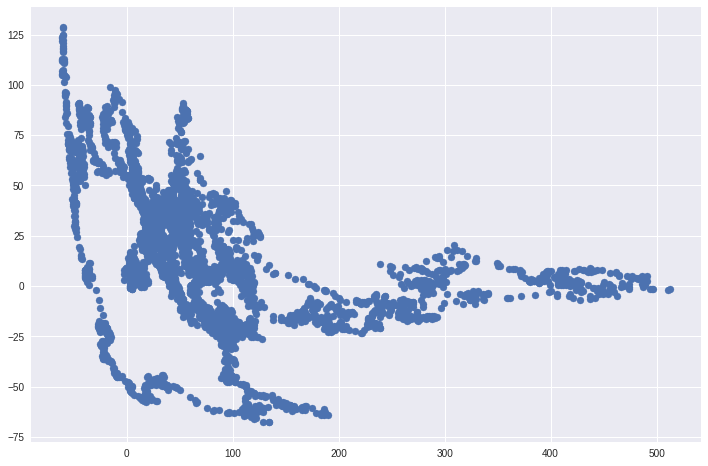

In [109]:
plt.figure(figsize=[12,8])
plt.scatter(tempor['PRED_1Y'], tempor['1Y_change'])
tempor[['PRED_1Y', '1Y_change']].corr()

In [112]:
tempor['LOW'] = 0
tempor.loc[tempor['1Y_change'] < 0, 'LOW'] = 1

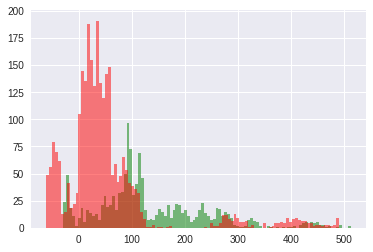

In [113]:
tempor.loc[tempor['LOW'] == 1, 'PRED_1Y'].hist(bins=100, color='green', alpha=0.5)
tempor.loc[tempor['LOW'] == 0, 'PRED_1Y'].hist(bins=100, color='red', alpha=0.5)

In [114]:
tempor.groupby('LOW')['PRED_1Y'].median()

LOW
0     34.198688
1    106.797259
Name: PRED_1Y, dtype: float64

In [115]:
from sklearn.ensemble import RandomForestRegressor

In [116]:
model = RandomForestRegressor()

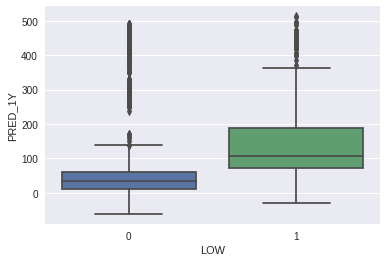

In [117]:
sns.boxplot(tempor['LOW'], tempor['PRED_1Y'])